In [29]:
import os

from deta import Deta
from dotenv import load_dotenv

load_dotenv()

PROJECT_DETA_KEY = os.getenv("project_deta_key")

# init with the key
deta = Deta(PROJECT_DETA_KEY)

# This is how to create/connect a database
db_income = deta.Base("finance_app_income")
db = deta.Base("finance_app")


In [32]:
res = db.fetch()
res.items

[{'bank': 'Nubank',
  'category': 'Alimentação',
  'created_at': '25-12-2022',
  'due_date': '15-01-2023',
  'key': '36kkiyhouuds',
  'product': 'Ração',
  'sub_category': 'Mercado',
  'total': 50,
  'type_buy': 'crédito',
  'type_spent': 'Variável'},
 {'bank': 'Ticket',
  'category': 'Alimentação',
  'created_at': '25-12-2022',
  'due_date': '25-12-2022',
  'key': 'm12q118zprw6',
  'product': 'Tomate',
  'sub_category': 'Mercado',
  'total': 20,
  'type_buy': 'débito',
  'type_spent': 'Variável'},
 {'bank': 'Nubank',
  'category': 'Alimentação',
  'created_at': '25-12-2022',
  'due_date': '19-01-2023',
  'key': 'psn6hg20jhn4',
  'product': 'cabelo',
  'sub_category': 'Mercado',
  'total': 500,
  'type_buy': 'crédito',
  'type_spent': 'Variável'}]

In [33]:
import pandas as pd

data = pd.DataFrame(res.items)
data

,bank,category,created_at,due_date,key,product,sub_category,total,type_buy,type_spent
0,Nubank,Alimentação,25-12-2022,15-01-2023,36kkiyhouuds,Ração,Mercado,50,crédito,Variável
1,Ticket,Alimentação,25-12-2022,25-12-2022,m12q118zprw6,Tomate,Mercado,20,débito,Variável
2,Nubank,Alimentação,25-12-2022,19-01-2023,psn6hg20jhn4,cabelo,Mercado,500,crédito,Variável


In [55]:
data["due_month"] = data["due_date"].map(lambda x: int(x.split("-")[1]))
data["due_year"] = data["due_date"].map(lambda x: int(x.split("-")[-1]))
data

,bank,category,created_at,due_date,key,product,sub_category,total,type_buy,type_spent,due_month,due_year
0,Nubank,Alimentação,25-12-2022,15-01-2023,36kkiyhouuds,Ração,Mercado,50,crédito,Variável,1,2023
1,Ticket,Alimentação,25-12-2022,25-12-2022,m12q118zprw6,Tomate,Mercado,20,débito,Variável,12,2022
2,Nubank,Alimentação,25-12-2022,19-01-2023,psn6hg20jhn4,cabelo,Mercado,500,crédito,Variável,1,2023


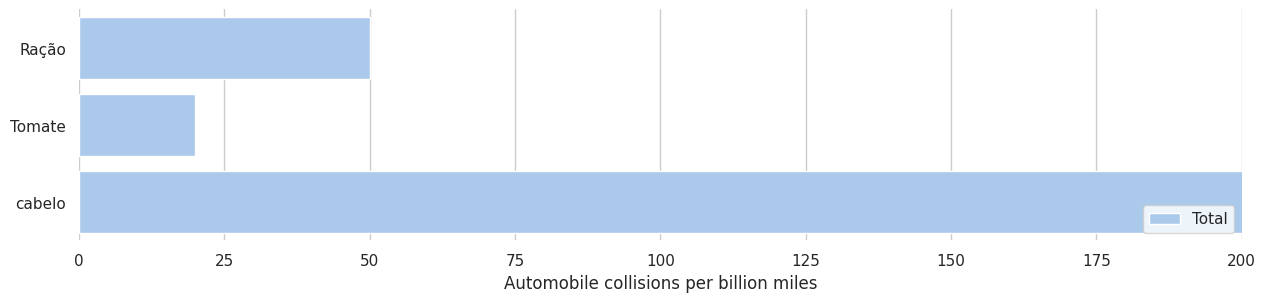

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(15, 3))

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="total", y="product", data=data,
            label="Total", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 200), ylabel="",
       xlabel="Automobile collisions per billion miles")
sns.despine(left=True, bottom=True)

In [28]:
from bokeh.io import output_file, show
from bokeh.plotting import figure

output_file("bar_sorted.html")

fruits = ['Apples', 'Pears', 'Nectarines', 'Plums', 'Grapes', 'Strawberries']
counts = [5, 3, 4, 2, 4, 6]

# sorting the bars means sorting the range factors
sorted_fruits = sorted(fruits, key=lambda x: counts[fruits.index(x)])

p = figure(y_range=sorted_fruits, width=350, title="Fruit counts",
           toolbar_location=None, tools="")



p.hbar(y=fruits, right=counts, left=0, height=0.9)

p.xgrid.grid_line_color = None
p.y_range.start = 0

show(p)


RuntimeError: FactorRange.start is a readonly property